## Portfolio Part 2

The goal of the second Portfolio task is to train linear regression models to predict users' ratings towards movies. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. I will continue using the movielens dataset

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
# renaming and importing the movielens_data_clean file
original_df = pd.read_csv('movielens_data_clean.csv')

In [46]:
print("the length of the new data :",len(original_df))

the length of the new data : 96854


### Explore the Dataset


In [47]:
original_df.head()

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
1,22,25.0,M,writer,377,1.0,Children,878887116
2,244,28.0,M,technician,51,2.0,Romance,880606923
3,298,44.0,M,executive,474,4.0,War,884182806
4,253,26.0,F,librarian,465,5.0,Adventure,891628467


In [5]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96854 entries, 0 to 96853
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   userId      96854 non-null  int64  
 1   age         96854 non-null  float64
 2   gender      96854 non-null  object 
 3   occupation  96854 non-null  object 
 4   movieId     96854 non-null  int64  
 5   rating      96854 non-null  float64
 6   genre       96854 non-null  object 
 7   timestamp   96854 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 5.9+ MB


In [6]:
original_df.dtypes

userId          int64
age           float64
gender         object
occupation     object
movieId         int64
rating        float64
genre          object
timestamp       int64
dtype: object

In [7]:
#drop all unwanted attributes from the dataframe

original_df_corr = original_df.drop(['userId','movieId','timestamp'],axis=1)
original_df_corr.head()

,age,gender,occupation,rating,genre
0,49.0,M,writer,3.0,Comedy
1,25.0,M,writer,1.0,Children
2,28.0,M,technician,2.0,Romance
3,44.0,M,executive,4.0,War
4,26.0,F,librarian,5.0,Adventure


In [8]:
#change data type into categorical from object

original_df_corr["occupation"] = original_df_corr["occupation"].astype('category')
original_df_corr["genre"] = original_df_corr["genre"].astype('category')
original_df_corr["gender"] = original_df_corr["gender"].astype('category')


original_df_corr.dtypes

age            float64
gender        category
occupation    category
rating         float64
genre         category
dtype: object

In [9]:
#change datatype into numerical from categorical

original_df_corr["occupation.cat"] = original_df_corr["occupation"].cat.codes
original_df_corr["genre.cat"] = original_df_corr["genre"].cat.codes
original_df_corr["gender.cat"] = original_df_corr["gender"].cat.codes

original_df_corr.head()

,age,gender,occupation,rating,genre,occupation.cat,genre.cat,gender.cat
0,49.0,M,writer,3.0,Comedy,19,4,1
1,25.0,M,writer,1.0,Children,19,3,1
2,28.0,M,technician,2.0,Romance,18,13,1
3,44.0,M,executive,4.0,War,6,16,1
4,26.0,F,librarian,5.0,Adventure,10,1,0


In [10]:
# correlation between the attributes 

original_df_corr.corr()

,age,rating,occupation.cat,genre.cat,gender.cat
age,1.000000,0.051724,-0.370879,0.027286,0.037126
rating,0.051724,1.000000,-0.033717,0.045250,-0.007239
occupation.cat,-0.370879,-0.033717,1.000000,-0.011443,0.012117
genre.cat,0.027286,0.045250,-0.011443,1.000000,-0.000509
gender.cat,0.037126,-0.007239,0.012117,-0.000509,1.000000


### conclusion for correlation:
 
 After analysing the data for correlation of rating with age/gender/occupation/genre , we can conclude that the most correlated 
 type with rating was age followed by genre meanwhile occupation and gender where the least correlated . However occupation still had a little more correlation with rating compared to gender. In addition, age and genre will have the best predicition model for rating since they have a higher correlation meanwhile occupation and gender will probably have the worse models.

### Split Training and Testing Data


In [11]:
# case 1
x1_train, y1_test = train_test_split(original_df_corr, test_size=0.9, random_state=142)
print("shape of the training data in case 1:",x1_train.shape)
print("shape of the testing data in case 1:",y1_test.shape)


shape of the training data in case 1: (9685, 8)
shape of the testing data in case 1: (87169, 8)


In [12]:
#case 2
X2_train, Y2_test = train_test_split(original_df_corr, test_size=0.1, random_state=142)
print("shape of the training data in case 2:",X2_train.shape)
print("shape of the testing data in case 2:",Y2_test.shape)

shape of the training data in case 2: (87168, 8)
shape of the testing data in case 2: (9686, 8)


### Train Linear Regression Models with Feature Selection 

In [13]:
# train model-a

description1 = ['age', 'genre.cat']

x1_train = original_df_corr[description1]
y1_train = original_df_corr['rating']

x1_test = original_df_corr[description1]
y1_test = original_df_corr['rating']

reg1 = linear_model.LinearRegression()
reg1.fit(x1_train,y1_train)


LinearRegression()

In [14]:
# train model-b

description2 = ['occupation.cat', 'gender.cat']

x1_b_train = original_df_corr[description2]
y1_b_train = original_df_corr['rating']

x1_b_test = original_df_corr[description2]
y1_b_test = original_df_corr['rating']

reg2 = linear_model.LinearRegression()
reg2.fit(x1_b_train,y1_b_train)


LinearRegression()

In [15]:
# train model-c

description3 = ['age', 'gender.cat']

X2_train = original_df_corr[description3]
Y2_train = original_df_corr['rating']

X2_test = original_df_corr[description3]
Y2_test = original_df_corr['rating']

reg3 = linear_model.LinearRegression()
reg3.fit(X2_train,Y2_train)


LinearRegression()

In [16]:
# train model-d

description4 = ['occupation.cat', 'gender.cat']

X2_d_train = original_df_corr[description4]
Y2_d_train = original_df_corr['rating']

X2_d_test = original_df_corr[description4]
Y2_d_test = original_df_corr['rating']

reg4 = linear_model.LinearRegression()
reg4.fit(X2_d_train,Y2_d_train)


LinearRegression()

### Evaluate Models
* We will Evaluate the performance of the four models with two metrics, including MSE and Root MSE


In [17]:
# evaluate model-a

predicted1 = reg1.predict(x1_test)
mse = ((np.array(y1_test)-predicted1)**2).sum()/len(y1_test)
r2 = r2_score(y1_test, predicted1)
print("MSE:", mse)
print("Root MSE:", np.sqrt(mse))
print("R Squared:", r2)

MSE: 1.2397839161335455
Root MSE: 1.11345584381849
R Squared: 0.004598586480398459


In [18]:
# evaluate model-b

predicted2 = reg2.predict(x1_b_test)
mse_2 = ((np.array(y1_b_test)-predicted2)**2).sum()/len(y1_b_test)
r2_2 = r2_score(y1_b_test, predicted2)
print("MSE:", mse_2)
print("Root MSE:", np.sqrt(mse_2))
print("R Squared:", r2_2)

MSE: 1.2440374496703286
Root MSE: 1.1153642677037527
R Squared: 0.0011834967701116472


In [20]:
# evaluate model-c

predicted3 = reg3.predict(X2_test)
mse_3 = ((np.array(Y2_test)-predicted3)**2).sum()/len(Y2_test)
r2_3 = r2_score(Y2_test, predicted3)
print("MSE:", mse_3)
print("Root MSE:", np.sqrt(mse_3))
print("R Squared:", r2_3)

MSE: 1.2420747229567661
Root MSE: 1.1144840613291722
R Squared: 0.0027593366560858534


In [21]:
# evaluate model-d

predicted4 = reg4.predict(X2_d_test)
mse_4 = ((np.array(Y2_d_test)-predicted4)**2).sum()/len(Y2_d_test)
r2_4 = r2_score(Y2_d_test, predicted4)
print("MSE:", mse_4)
print("Root MSE:", np.sqrt(mse_4))
print("R Squared:", r2_4)

MSE: 1.2440374496703286
Root MSE: 1.1153642677037527
R Squared: 0.0011834967701116472


### Visualise, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [29]:
# create the MSE data frame to plot
MSE_graph = pd.DataFrame({'mse': [mse,mse_2,mse_3,mse_4]},index=['model-a', 'model-b', 'model-c','model-d'])

# create the R-sqaured data frame to plot
Rsquared_graph = pd.DataFrame({'R-squared': [r2,r2_2,r2_3,r2_4]},index=['model-a', 'model-b', 'model-c','model-d'])



(array([0, 1, 2, 3]),
 [Text(0, 0, 'model-a'),
  Text(1, 0, 'model-b'),
  Text(2, 0, 'model-c'),
  Text(3, 0, 'model-d')])

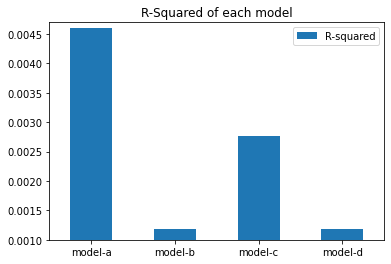

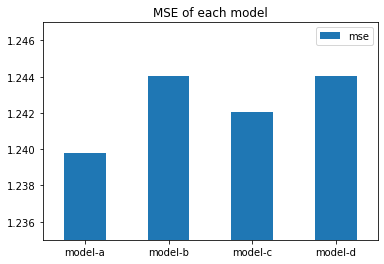

In [43]:
#plot MSE
Rsquared_graph.plot(kind='bar',ylim=(0.001,0.0047),title='R-Squared of each model')
plt.xticks(rotation=0)

#plot R-squared
MSE_graph.plot(kind='bar',ylim=(1.235,1.247),title='MSE of each model')
plt.xticks(rotation=0)


## analysing the metrics for models according to correlation

 it can be concluded that the most correlated attributes (model-a and model- c) were the best models in this study, as both had the lowest mean squared error( MSE) and the highest R-sqaured ( as shown in the graphs above) whereas the least correlated attributes had the worst performing model as they had the highest MSE and R-sqaured. 

## does the training data size affect the study?
 by comparing the metrics of model-a with model-c and model-b with model-d (since they have the same attributes but different training data size) , we can conclude that in this model , training more data did not yield better results since model-a had a lower MSE and higher R-sqaured tha model-c which had more training data. The reason for this might be that linear regression model might not be the suitable model for this study